In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

response = requests.get(wiki_url,headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"})

response

<Response [200]>

In [4]:
# Si la petición se ha ejecutado correctamente (código 200), entonces el contenido HTML de la página se ha podido descargar
if response:
    # Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
    soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [5]:
table = soup.find_all('table', class_='wikitable')
table

[<table class="wikitable sortable plainrowheaders">
 <tbody><tr>
 <th>Rank
 </th>
 <th>Song
 </th>
 <th>Artist(s)
 </th>
 <th>Streams<br/>(billions)
 </th>
 <th>Release date
 </th>
 <th class="unsortable"><abbr title="References">Ref.</abbr>
 </th></tr>
 <tr>
 <td style="text-align:center;">1
 </td>
 <th scope="row">"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"
 </th>
 <td style="text-align:left;"><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>
 <td style="text-align:center;">5.174</td>
 <td style="text-align:right;"><span data-sort-value="000000002019-11-29-0000" style="white-space:nowrap">29 November 2019</span></td>
 <td style="text-align:center;"><sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
 </td></tr>
 <tr>
 <td style="text-align:center;">2
 </td>
 <th scope="row">"<a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a>"
 <

In [6]:
encabezados = []
for th in soup.find_all('th')[0:5]:
    encabezados.append(th.get_text().strip())

encabezados

['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date']

In [9]:
filas = []

for tr in soup.find_all('tr')[1:100]:
    celdas = tr.find_all(['td','th'])[0:5]
    info_fila = [celda.get_text() for celda in celdas]
    if info_fila:
        filas.append(info_fila)




In [11]:
df = pd.DataFrame(filas, columns=encabezados)
df["Streams(billions)"] = df["Streams(billions)"].astype('float')
df["Release date"] = pd.to_datetime(df["Release date"])
df

,Rank,Song,Artist(s),Streams(billions),Release date
0,1\n,"""Blinding Lights""\n",The Weeknd,5.174,2019-11-29
1,2\n,"""Shape of You""\n",Ed Sheeran,4.677,2017-01-06
2,3\n,"""Starboy""\n",The Weeknd and Daft Punk,4.245,2016-09-21
3,4\n,"""Sweater Weather""\n",The Neighbourhood,4.233,2012-12-03
4,5\n,"""Someone You Loved""\n",Lewis Capaldi,4.156,2018-11-08
...,...,...,...,...,...
94,95\n,"""Sicko Mode""\n",Travis Scott and Drake,2.498,2018-08-21
95,96\n,"""Lean On""\n",Major Lazer with DJ Snake and M∅,2.497,2015-03-02
96,97\n,"""Someone Like You""\n",Adele,2.474,2011-01-24
97,98\n,"""Payphone""\n",Maroon 5 and Wiz Khalifa,2.470,2012-04-16


Carga de información a base de datos SQL

In [12]:
import sqlite3

conn = sqlite3.connect('../data/web_db.db')

In [13]:
## Cargar datos a SQL
df.to_sql("spotify", conn, if_exists='replace', index=False)
cursor = conn.cursor()

In [14]:
pd.read_sql_query("SELECT * FROM spotify LIMIT 5;", conn)

,Rank,Song,Artist(s),Streams(billions),Release date
0,1\n,"""Blinding Lights""\n",The Weeknd,5.174,2019-11-29 00:00:00
1,2\n,"""Shape of You""\n",Ed Sheeran,4.677,2017-01-06 00:00:00
2,3\n,"""Starboy""\n",The Weeknd and Daft Punk,4.245,2016-09-21 00:00:00
3,4\n,"""Sweater Weather""\n",The Neighbourhood,4.233,2012-12-03 00:00:00
4,5\n,"""Someone You Loved""\n",Lewis Capaldi,4.156,2018-11-08 00:00:00


In [17]:
# Preparar tres visualizaciones diferentes con los datos cargados
import matplotlib.pyplot as plt
import seaborn as sns

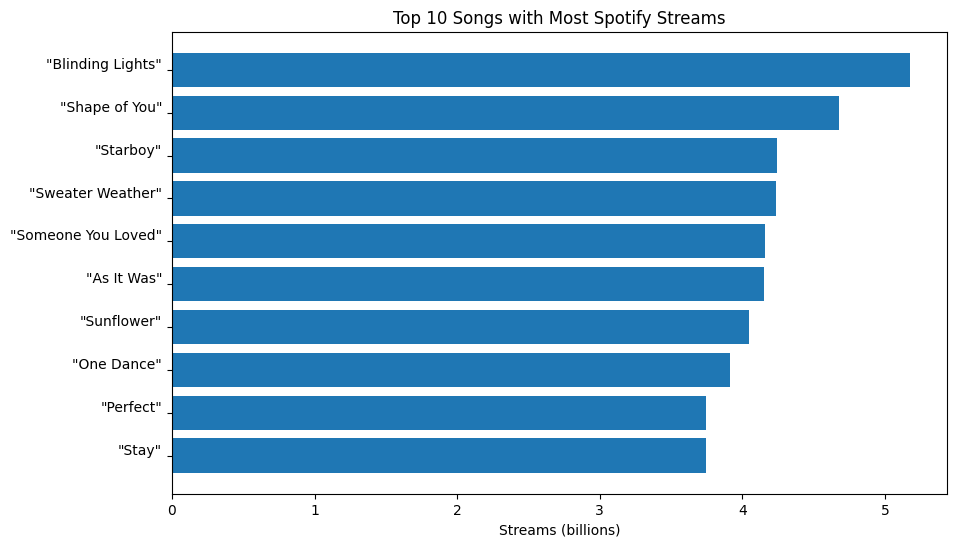

In [18]:
# Visualización 1: Top 10 canciones con más streams
top_10 = df.nlargest(10, 'Streams(billions)')
plt.figure(figsize=(10,6))
plt.barh(top_10['Song'], top_10['Streams(billions)'])
plt.xlabel('Streams (billions)')
plt.title('Top 10 Songs with Most Spotify Streams')
plt.gca().invert_yaxis()
plt.show()

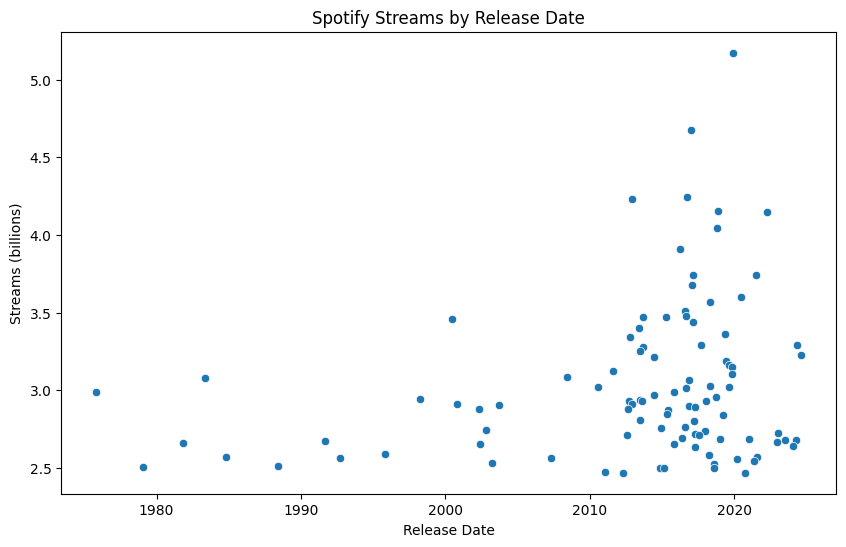

In [20]:
# Visualización 2: Distribución de streams por fecha de lanzamiento
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Release date', y='Streams(billions)')
plt.xlabel('Release Date')
plt.ylabel('Streams (billions)')
plt.title('Spotify Streams by Release Date')
plt.show()


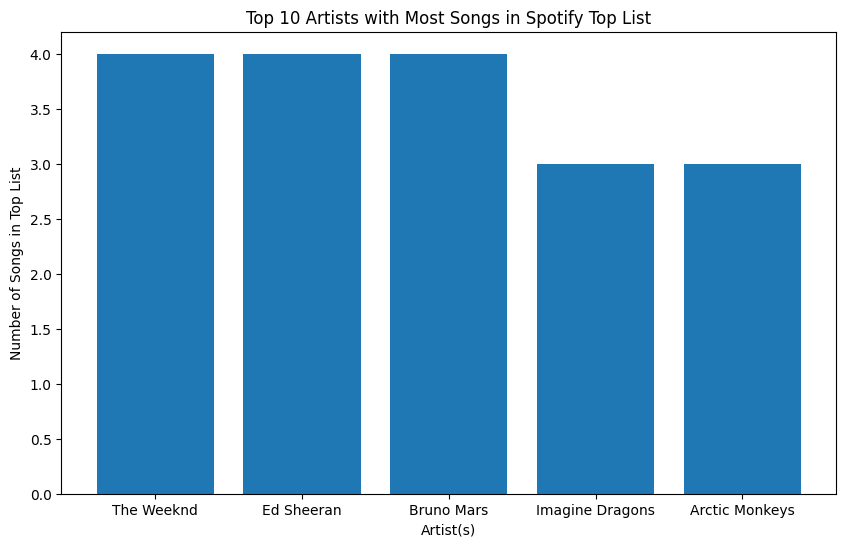

In [31]:
# Visualización 3: Artistas con más canciones en la lista

plt.figure(figsize=(10,6))
conteo_de_artistas = df['Artist(s)'].value_counts()
conteo_de_artistas.head(10)
plt.bar(conteo_de_artistas.head(5).index, conteo_de_artistas.head(5).values)
plt.xlabel('Artist(s)')
plt.ylabel('Number of Songs in Top List') 
plt.title('Top 10 Artists with Most Songs in Spotify Top List')
plt.show()

